### TALLER 1 - Distancia, norma y convergencia

María Alejandra Reyes Afanador - mareyesa@eafit.edu.co
, Jhon Jairo Hernandez Slait - jjhernans1@eafit.edu.co
 y Cristian Alberto López Chaverra - calopezc@eafit.edu.co

Algebra en Ciencia de los Datos

2023 - 2

### Problema 1


Elija un vocabulario técnico correspondiente a un dominio específico, por ejemplo, nombres científicos de animales. Programe una función tipo auto- corrector que dada una palabra cualquiera encuentre la palabra más similar dentro del vocabulario elegido.

Solución.

Se toma el dataset lenguajes de programación de kaggle: https://www.kaggle.com/datasets/alepuzio/programminglanguages
, con este se obtienen los nombres de los diferentes lenguajes de programación, para que dada una palabra cualquiera auto complete con el lenguaje que tenga mayor similitud.

Además, se utiliza la distancia de Levenshtein para medir la similitud entre la palabra ingresada y cada palabra en la lista de lenguajes de programación. La distancia se representa con la cantidad mínima de operaciones de edición (inserción, eliminación o sustitución) necesarias para convertir una palabra en otra.

In [2]:
pip install python-Levenshtein

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import Levenshtein

# Carga el dataset desde el archivo CSV con el vocabulario
ruta_csv = "/Users/cristianlopez/Downloads/Dataset auto- corrector.csv"

try:
    # Intenta cargar el archivo CSV
    df = pd.read_csv(ruta_csv, encoding='ISO-8859-1', delimiter=';')
    
    # Verifica la estructura del DataFrame
    if 'Language' not in df.columns:
        raise Exception("La columna 'Language' no se encontró en el archivo CSV.")
    
    # Imprime la lista de lenguajes de programación
    lenguajes_programacion = df['Language'].tolist()
    
    # Función para encontrar la palabra más similar dentro del vocabulario
    def encontrar_similar(palabra, vocabulario):
        palabra = palabra.lower()  # Convertir a minúsculas
        distancias = [(lenguaje.lower(), Levenshtein.distance(palabra, lenguaje.lower())) for lenguaje in vocabulario]
        distancias_ordenadas = sorted(distancias, key=lambda x: x[1])
        palabra_similar = distancias_ordenadas[0][0]
        # Convertir la primera letra en mayúscula
        palabra_similar = palabra_similar.capitalize()
        return palabra_similar
    
    # INGRESAR PALABRA PARA AUTO-COMPLETAR CON LENGUAJE DE PROGRAMACIÓN
    input_usuario = "java"  
    
    # Encuentra la palabra más similar dentro del vocabulario
    palabra_similar = encontrar_similar(input_usuario, lenguajes_programacion)
    
    # Imprime la palabra más similar
    print(f"Palabra con menor distancia dentro del vocabulario: {palabra_similar}")
    
except Exception as e:
    print(f"Error al cargar y limpiar el archivo CSV: {e}")


Palabra con menor distancia dentro del vocabulario: Java


### Problema 2
A partir del algoritmo de k-vecinos más cercanos cree un modelo que clasifique fotografías según el género de la persona retratada. Justifique por qué la distancia que usted usó es apropiada para este problema.

In [4]:
!pip install opencv-python
!pip install numpy
!pip install scikit-learn
!pip install imutils
!pip install scikit-image
!pip install scikit-learn numpy

In [5]:
import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from imutils import paths
import pandas as pd
from skimage import exposure
from skimage.feature import hog
from sklearn.model_selection import cross_val_score

In [8]:
# Define las dimensiones en centímetros y la resolución en DPI
#ancho_cm = 3.5
#alto_cm = 4.5
#resolucion_dpi = 300

# Convierte las dimensiones de centímetros a píxeles
#ancho_px = int(ancho_cm * (resolucion_dpi / 2.54))
#alto_px = int(alto_cm * (resolucion_dpi / 2.54))

    # Lista de rutas de imágenes hombres-mujeres
    image_paths_hombre = list(paths.list_images("/Users/cristianlopez/Downloads/imagenes/hombre"))
    image_paths_mujer = list(paths.list_images("/Users/cristianlopez/Downloads/imagenes/mujer"))

    # Tamaño al que deseas redimensionar las imágenes
    ancho_px = 400
    alto_px = 600

    # Listas para almacenar las imágenes redimensionadas
    imagenes_redimensionadas_hombre = []
    imagenes_redimensionadas_mujer = []

    # Redimensionar imágenes de hombres
    for ruta in image_paths_hombre:
        imagen = cv2.imread(ruta)
        imagen_redimensionada = cv2.resize(imagen, (ancho_px, alto_px))
        imagenes_redimensionadas_hombre.append(imagen_redimensionada)

    # Redimensionar imágenes de mujeres
    for ruta in image_paths_mujer:
        imagen = cv2.imread(ruta)
        imagen_redimensionada = cv2.resize(imagen, (ancho_px, alto_px))
        imagenes_redimensionadas_mujer.append(imagen_redimensionada)

    # Combina etiquetas y rutas
    etiquetas_hombre = [0] * len(image_paths_hombre)
    etiquetas_mujer = [1] * len(image_paths_mujer)
    etiquetas = etiquetas_hombre + etiquetas_mujer

    df = pd.DataFrame({'image_path': image_paths_hombre + image_paths_mujer, 'genero': etiquetas})

    def extract_features(image):
        # Convierte la imagen a tipo de datos float32
        image = image.astype(np.float32)

        # Escala la imagen al rango [0, 255]
        image = (image / image.max()) * 255.0

        # Convierte la imagen a escala de grises
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Calcula las características HOG
        fd = hog(gray_image, orientations=8, pixels_per_cell=(16, 16),
                 cells_per_block=(1, 1), block_norm='L2-Hys', visualize=False, feature_vector=True)

        return fd

    X = []
    for image_path in df['image_path']:
        imagen = cv2.imread(image_path)
        if imagen is not None:
            imagen = cv2.resize(imagen, (ancho_px, alto_px))
            imagen = exposure.equalize_adapthist(imagen)
            features = extract_features(imagen)
            X.append(features)

    X = np.array(X)
    y = df['genero'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 6 extraneous bytes before marker 0xed
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 5 extraneous bytes before marker 0xee
Corrupt JPEG data: 6 extraneous bytes before marker 0xed
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 6 extraneous bytes before marker 0xed
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
Corrupt

In [32]:
df

,image_path,genero
0,/Users/cristianlopez/Downloads/imagenes/hombre...,0
1,/Users/cristianlopez/Downloads/imagenes/hombre...,0
2,/Users/cristianlopez/Downloads/imagenes/hombre...,0
3,/Users/cristianlopez/Downloads/imagenes/hombre...,0
4,/Users/cristianlopez/Downloads/imagenes/hombre...,0
...,...,...
2313,/Users/cristianlopez/Downloads/imagenes/mujer/...,1
2314,/Users/cristianlopez/Downloads/imagenes/mujer/...,1
2315,/Users/cristianlopez/Downloads/imagenes/mujer/...,1
2316,/Users/cristianlopez/Downloads/imagenes/mujer/...,1


In [122]:
#Prueba para determinar la distancia con mayor precisión

In [9]:
#Distancia euclidiana
rangos_k = list(range(1, 31))
cv_scores = []

for k in rangos_k:
    knn_temp = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    scores = cross_val_score(knn_temp, X_train, y_train, cv=12, scoring='accuracy')
    cv_scores.append(scores.mean())

optimal_k = rangos_k[cv_scores.index(max(cv_scores))]

# Entrenar el modelo con el k óptimo

knn = KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')
knn.fit(X_train, y_train)

print(f"El número óptimo de vecinos es {optimal_k}")


y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo KNN:", accuracy)


El número óptimo de vecinos es 15
Precisión del modelo KNN: 0.8168103448275862


In [10]:
# Distancia manhattan
rangos_k_manhattan = list(range(1, 31))
cv_scores_manhattan = []

for k in rangos_k_manhattan:
    knn_temp_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    scores_manhattan = cross_val_score(knn_temp_manhattan, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores_manhattan.append(scores_manhattan.mean())

optimal_k_manhattan = rangos_k_manhattan[cv_scores_manhattan.index(max(cv_scores_manhattan))]

# Entrenar el modelo con el k óptimo de Manhattan
knn_manhattan = KNeighborsClassifier(n_neighbors=optimal_k_manhattan, metric='manhattan')
knn_manhattan.fit(X_train, y_train)

print(f"El número óptimo de vecinos con la distancia de Manhattan es {optimal_k_manhattan}")

# Realizar predicciones y calcular la precisión con la distancia de Manhattan
y_pred_manhattan = knn_manhattan.predict(X_test)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)
print("Precisión del modelo KNN con la distancia de Manhattan:", accuracy_manhattan)

El número óptimo de vecinos con la distancia de Manhattan es 22
Precisión del modelo KNN con la distancia de Manhattan: 0.8146551724137931


In [11]:
# Distancia chebyshev
rangos_k_chebyshev = list(range(1, 31))
cv_scores_chebyshev = []

for k in rangos_k_chebyshev:
    knn_temp_chebyshev = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    scores_chebyshev = cross_val_score(knn_temp_chebyshev, X_train, y_train, cv=12, scoring='accuracy')
    cv_scores_chebyshev.append(scores_chebyshev.mean())

optimal_k_chebyshev = rangos_k_chebyshev[cv_scores_chebyshev.index(max(cv_scores_chebyshev))]

# Entrenar el modelo con el k óptimo para la distancia de Chebyshev
knn_chebyshev = KNeighborsClassifier(n_neighbors=optimal_k_chebyshev, metric='chebyshev')
knn_chebyshev.fit(X_train, y_train)

print(f"El número óptimo de vecinos con la distancia de Chebyshev es {optimal_k_chebyshev}")

# Realizar predicciones y calcular la precisión con la distancia de Chebyshev
y_pred_chebyshev = knn_chebyshev.predict(X_test)
accuracy_chebyshev = accuracy_score(y_test, y_pred_chebyshev)
print("Precisión del modelo KNN con la distancia de Chebyshev:", accuracy_chebyshev)

El número óptimo de vecinos con la distancia de Chebyshev es 11
Precisión del modelo KNN con la distancia de Chebyshev: 0.8125


In [29]:
# Cargar la nueva imagen
ruta_nueva_imagen = '/Users/cristianlopez/Downloads/imagen prueba 1.jpg'
imagen_nueva = cv2.imread(ruta_nueva_imagen)

# Redimensionar la imagen
imagen_nueva_redimensionada = cv2.resize(imagen_nueva, (ancho_px, alto_px))

In [30]:
# Extraer características de la nueva imagen
caracteristicas_nueva_imagen = extract_features(imagen_nueva_redimensionada)

# Escalar las características
caracteristicas_nueva_imagen = scaler.transform([caracteristicas_nueva_imagen])

In [31]:
# Realizar la predicción usando el modelo KNN entrenado Euclidiana
prediccion = knn.predict(caracteristicas_nueva_imagen)

# La variable 'prediccion' ahora contiene la etiqueta predicha (0 para hombre, 1 para mujer)
print("Predicción para la nueva imagen:")
if prediccion[0] == 0:
    print("Hombre")
else:
    print("Mujer")


Predicción para la nueva imagen:
Mujer


In [28]:
prediccion

array([1])

## Problema 3

### 1. 
Grafique en el plano R2 la bola de radio r y centro en el origen respecto a la distancia de Minkowski de orden p, donde los parámetros r y p varían entre desde 0.1 a 2 y desde 1 a ∞.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

def minkowski_boundary(x, p, r):
    """Calcula el límite de y para una distancia de Minkowski dada, basada en x, p y r."""
    return np.power(np.abs(r**p - np.abs(x)**p), 1/p)

def plot_minkowski(p=2, r=1):
    plt.figure(figsize=(6, 6))
    
    # Definir el dominio x
    x = np.linspace(-r, r, 400)
    
    # Calcular los límites de y
    y_positive = minkowski_boundary(x, p, r)
    y_negative = -y_positive
    
    # Graficar la circunferencia
    plt.plot(x, y_positive, 'b', alpha=0.5)
    plt.plot(x, y_negative, 'b', alpha=0.5)
    
    # Configurar el aspecto de la trama
    plt.title(f"Minkowski p={p}")
    plt.xlim(-2.2, 2.2)
    plt.ylim(-2.2, 2.2)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

# Gráfico
interact(plot_minkowski, p=(1, 200), r=(0.1, 2.0));


interactive(children=(IntSlider(value=2, description='p', max=200, min=1), FloatSlider(value=1.0, description=…

Este código creamos un gráfico con las circunferencias de radio [0.1 - 2] utilizando la distancia de Minkowski de orden  p para p en el rango de valores especificados en p_values. A medida que cambiamos los valores en p_values, se verá cómo se modifican las circunferencias.

Observaciones importantes:

1. Cuando (p = 1): La distancia de Minkowski con (p = 1) es equivalente a la distancia de Manhattan. En este caso, las circunferencias tienen formas cuadradas con esquinas en los ejes, ya que la distancia de Manhattan considera solo movimientos verticales y horizontales.

2. Cuando (p = 2): La distancia de Minkowski con (p = 2) es equivalente a la distancia euclidiana. Las circunferencias son los círculos tradicionales que estamos acostumbrados a ver.

3. Cuando (p > 2): A medida que (p) aumenta más allá de (2), las circunferencias se vuelven cada vez más "cuadradas". Esto significa que la distancia de Minkowski con (p) grande tiende a considerar más fuertemente los movimientos en las diagonales y menos los movimientos en direcciones rectas.

4. Cuando (p = \infty\): La distancia de Minkowski con (p = \infty\) es equivalente a la distancia del máximo. En este caso, las circunferencias se convierten en cuadrados con lados paralelos a los ejes, ya que la distancia del máximo solo considera la coordenada que tiene la mayor diferencia en valor absoluto.

En resumen, la gráfica muestra cómo cambia la forma de las circunferencias a medida que varía el valor de (p) en la distancia de Minkowski. Para valores bajos de (p), las circunferencias son más redondas, mientras que para valores altos de (p), las circunferencias se vuelven más cuadradas. Esto ilustra cómo diferentes métricas de distancia pueden afectar la forma y la noción de cercanía en un espacio métrico.

### 2. 
Programe un algoritmo que dado n y p genere de forma aleatoria un vector de Rn cuya distancia de Minkowski de orden p al origen sea menor a 0.1.

In [22]:
def generar_vector(n, p):
    # Genera un vector aleatorio en R^n con valores entre -1 y 1
    vector = np.random.uniform(-1, 1, n)
    
    # Calcula la distancia de Minkowski al origen con orden p
    distancia = np.linalg.norm(vector, ord=p)
    
    # Normaliza el vector para que la distancia al origen sea menor a 0.1
    vector_normalizado = (0.1 / distancia) * vector
    
    return vector_normalizado

# Ejemplo de uso
n = 3  # Valor de n según la dimensión del espacio deseado
p = 2  # Valor de p según el orden de la distancia de Minkowski

# Vector aleatorio cuya distancia de Minkowski al origen es menor a 0.1
vector_resultante = generar_vector(n, p)

print("Vector generado:", vector_resultante)
print("Distancia de Minkowski al origen:", np.linalg.norm(vector_resultante, ord=p))


Vector generado: [0.04608403 0.05110373 0.07255805]
Distancia de Minkowski al origen: 0.1


# PROBLEMA 4

Tómese una foto tipo documento y transformela a escala de grises y resolu- ción 400 × 600. Dena una sucesión de imágenes que sea convergente a su foto. Muestre al menos 10 términos de la sucesión incluyendo el elemento 100-ésimo. Como la sucesión es convergente, obtenga el término tal que to- dos las imágenes siguientes en tienen una distancia (en norma de Frobenius) menor a 0.5 de su foto.

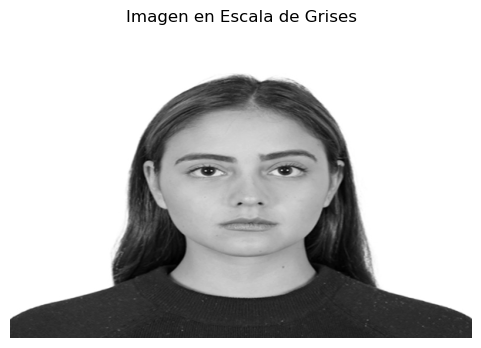

In [152]:
import cv2
import numpy as np

# Cargar la imagen y convertirla a escala de grises y resolución 400x600
foto_tipo_documento = cv2.imread("/Users/cristianlopez/Downloads/Foto tipo documento.png", cv2.IMREAD_GRAYSCALE)
foto_tipo_documento = cv2.resize(foto_tipo_documento, (600, 400))

# Visualizar la imagen en escala de grises
plt.figure(figsize=(6, 4))
plt.imshow(foto_tipo_documento, cmap='gray')
plt.title("Imagen en Escala de Grises")
plt.axis('off')
plt.show()

In [154]:
# Definir una sucesión de imágenes que convergen a la imagen original
num_imagenes = 110  # Incluyendo el elemento 100-ésimo
sucesion_imagenes = [foto_tipo_documento]  # Inicializar con la imagen original
for i in range(1, num_imagenes):
    # Interpolar entre la imagen original y la última imagen en la sucesión
    alpha = i / num_imagenes
    imagen_interpolada = cv2.addWeighted(foto_tipo_documento, 1 - alpha, sucesion_imagenes[-1], alpha, 0)
    sucesion_imagenes.append(imagen_interpolada)

# Encontrar el término donde todas las imágenes siguientes tienen una distancia menor a 0.5
indice_convergencia = None
for i, imagen in enumerate(sucesion_imagenes):
    distancia = np.linalg.norm(imagen - foto_tipo_documento, ord='fro') / np.linalg.norm(foto_tipo_documento, ord='fro')
    if distancia < 0.5:
        indice_convergencia = i

# Mostrar al menos 10 términos de la sucesión incluyendo el elemento 100-ésimo
print("Distancias de las imágenes generadas respecto a la imagen original:")
for i, imagen in enumerate(sucesion_imagenes[100:110], start=100):
    distancia = np.linalg.norm(imagen - foto_tipo_documento, ord='fro') / np.linalg.norm(foto_tipo_documento, ord='fro')
    print(f"Término {i}: Distancia = {distancia}")

# Mostrar el término donde todas las imágenes siguientes tienen una distancia menor a 0.5
print(f"El término donde todas las imágenes siguientes tienen una distancia menor a 0.5 es el término {indice_convergencia}.")

# Validación: Comprobar que las distancias son menores a 0.5
distancias_validacion = []
for i, imagen in enumerate(sucesion_imagenes):
    distancia = np.linalg.norm(imagen - foto_tipo_documento, ord='fro') / np.linalg.norm(foto_tipo_documento, ord='fro')
    distancias_validacion.append(distancia)

# Mostrar las distancias obtenidas
print("Distancias de todas las imágenes generadas respecto a la imagen original:")
print(distancias_validacion)

Distancias de las imágenes generadas respecto a la imagen original:
Término 100: Distancia = 0.0
Término 101: Distancia = 0.0
Término 102: Distancia = 0.0
Término 103: Distancia = 0.0
Término 104: Distancia = 0.0
Término 105: Distancia = 0.0
Término 106: Distancia = 0.0
Término 107: Distancia = 0.0
Término 108: Distancia = 0.0
Término 109: Distancia = 0.0
El término donde todas las imágenes siguientes tienen una distancia menor a 0.5 es el término 109.
Distancias de todas las imágenes generadas respecto a la imagen original:
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

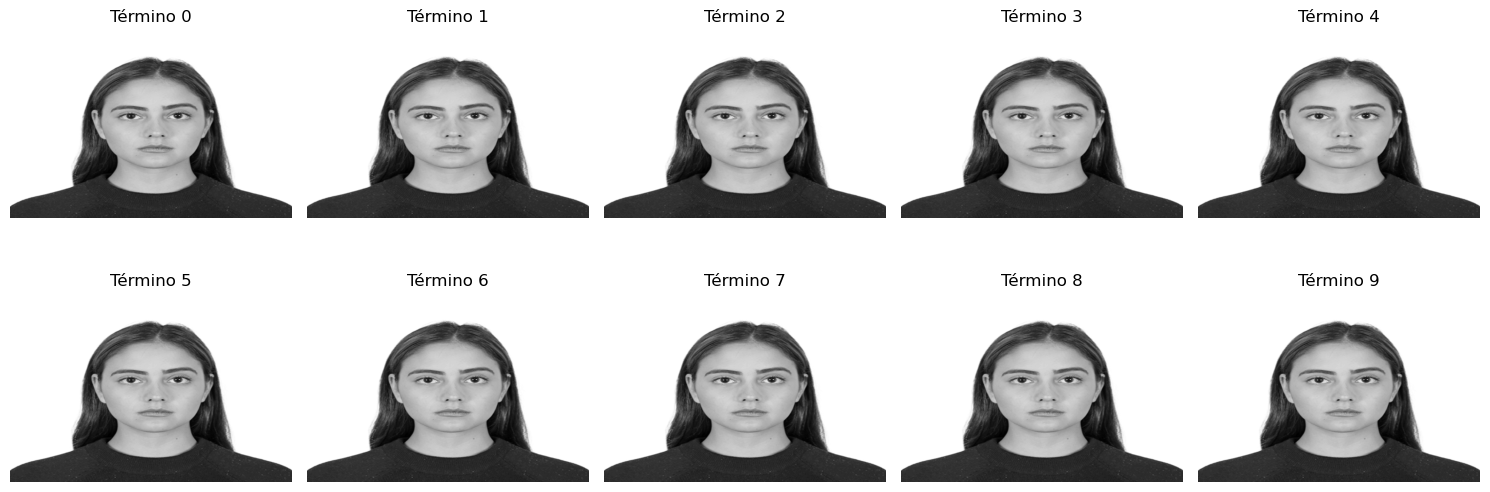

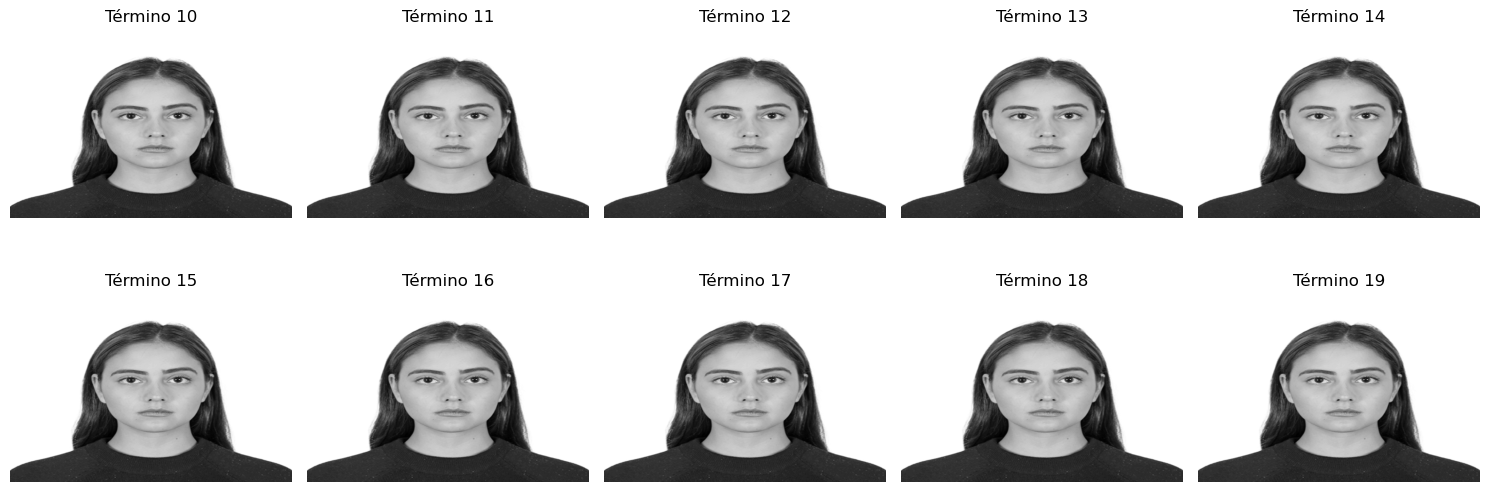

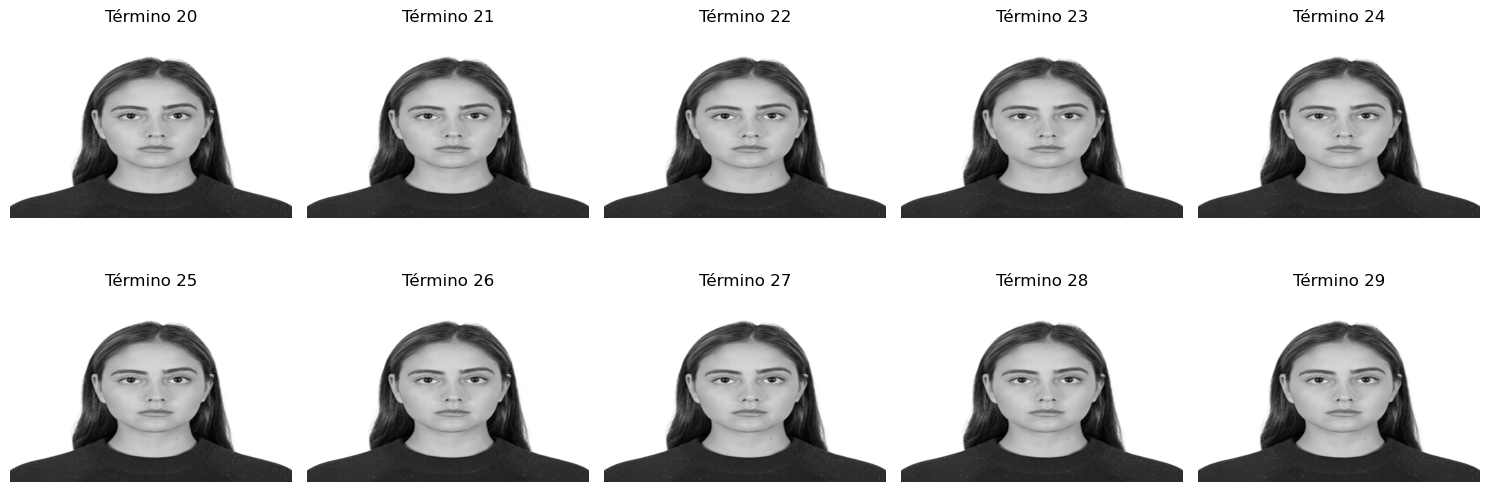

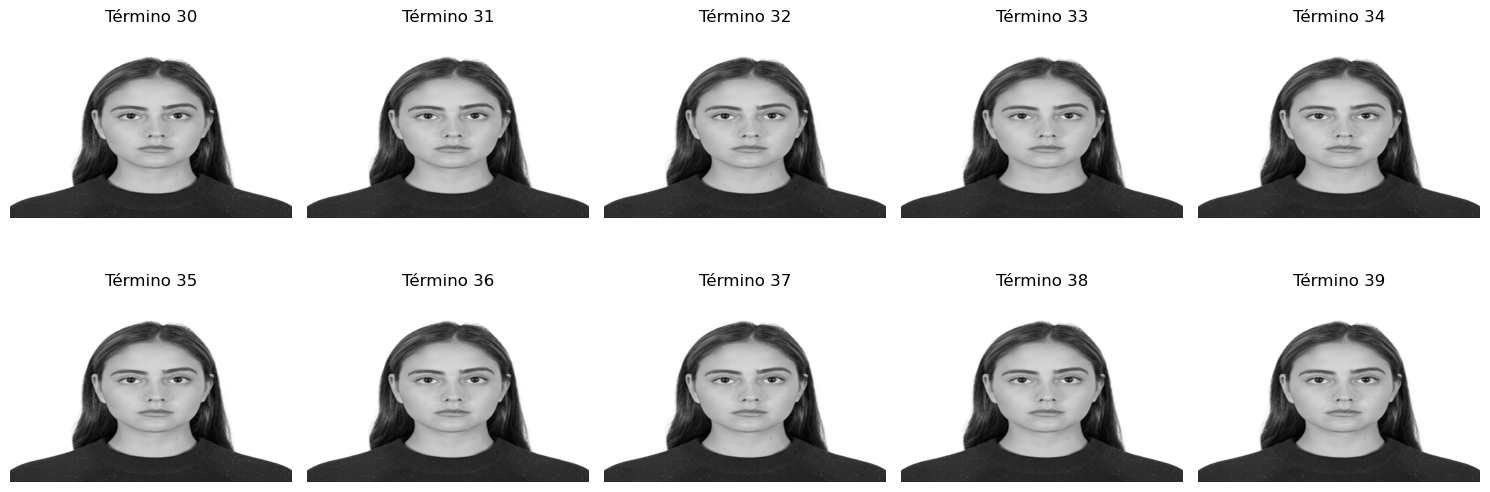

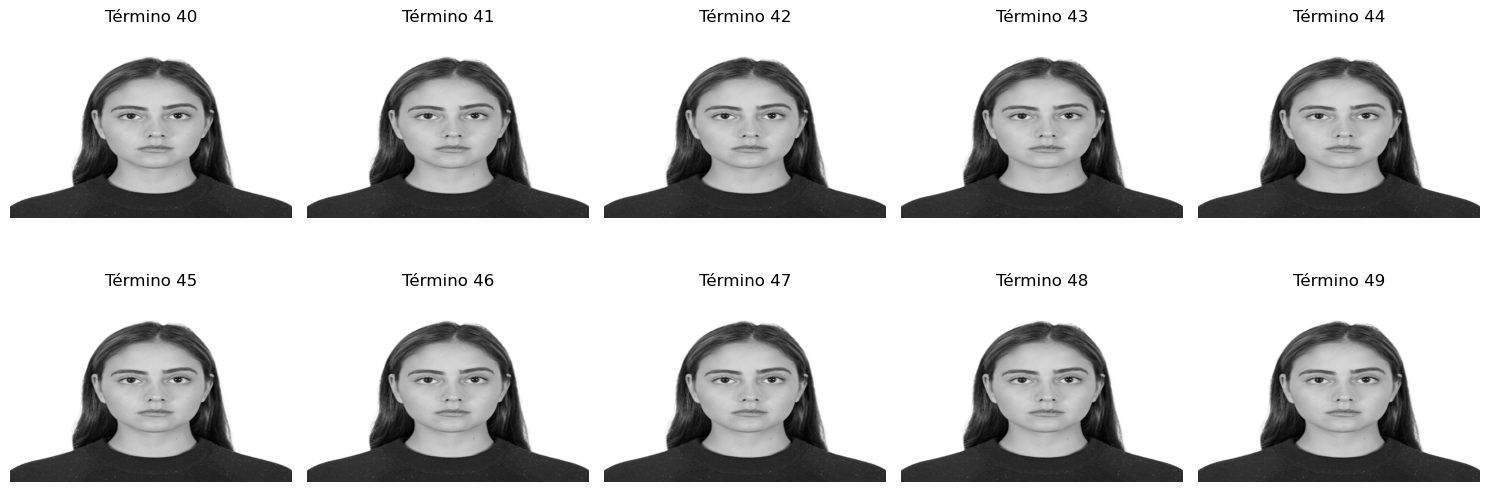

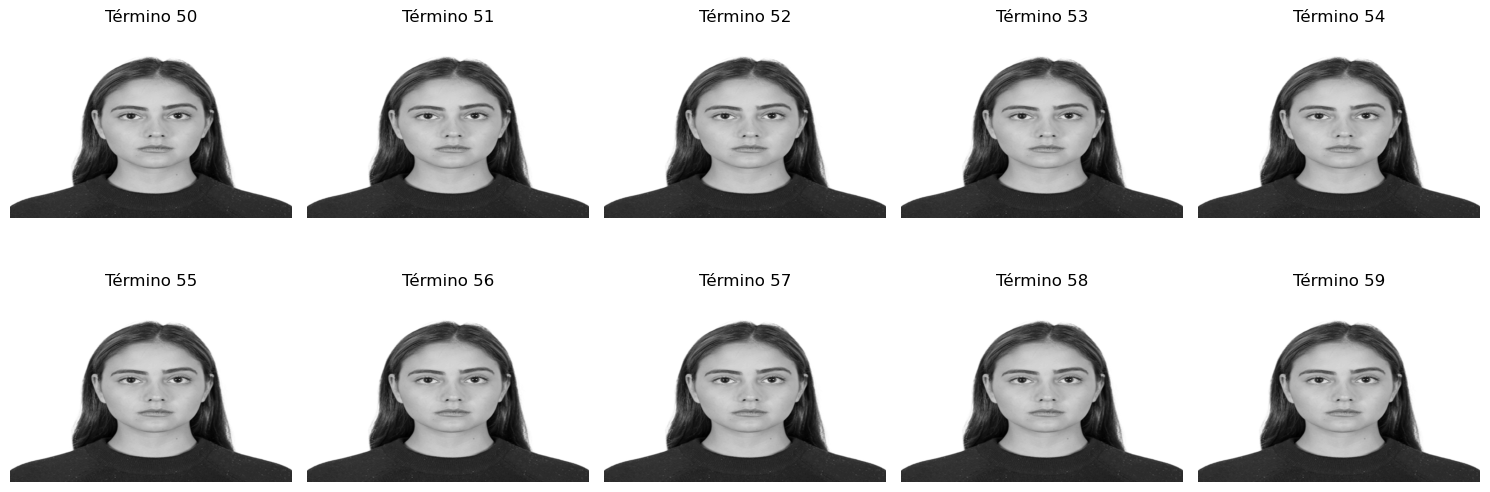

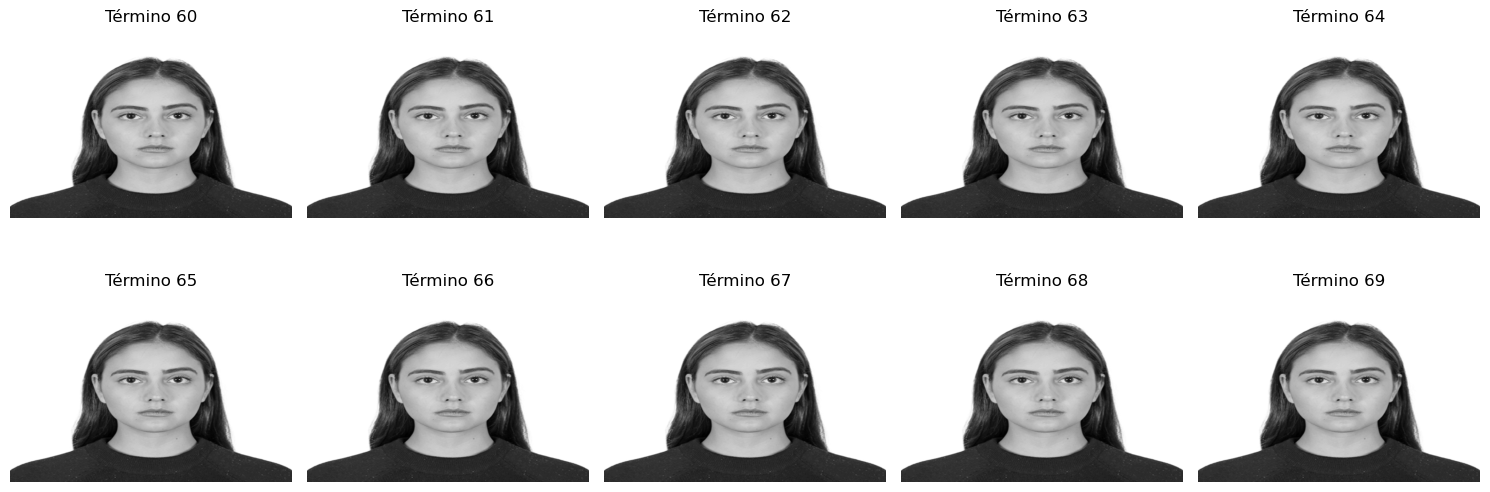

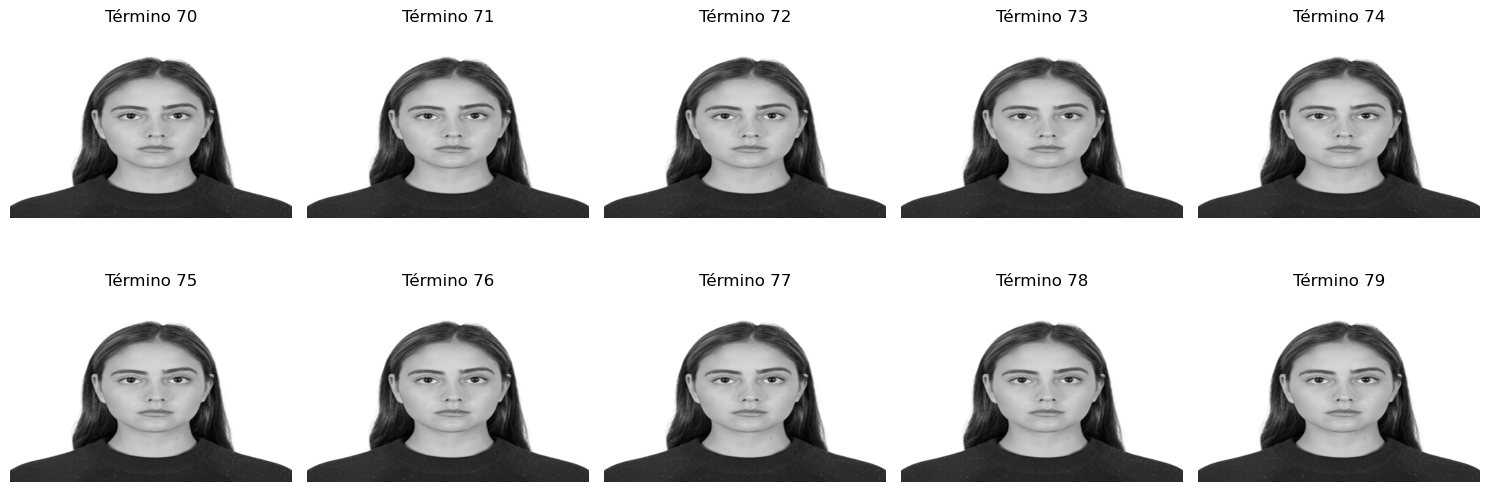

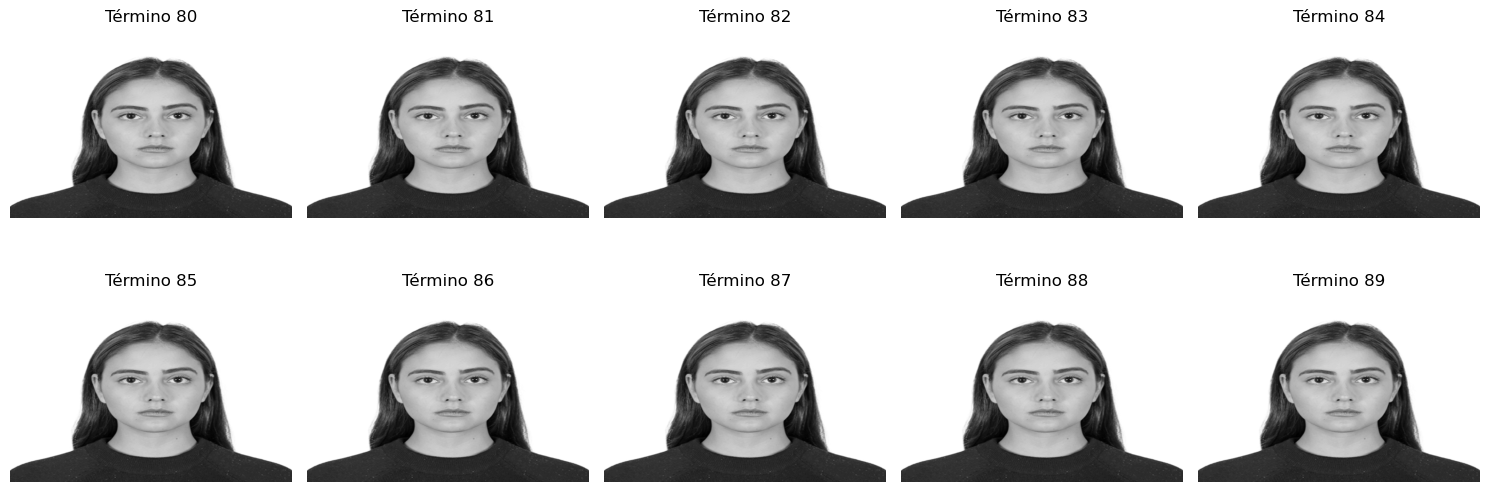

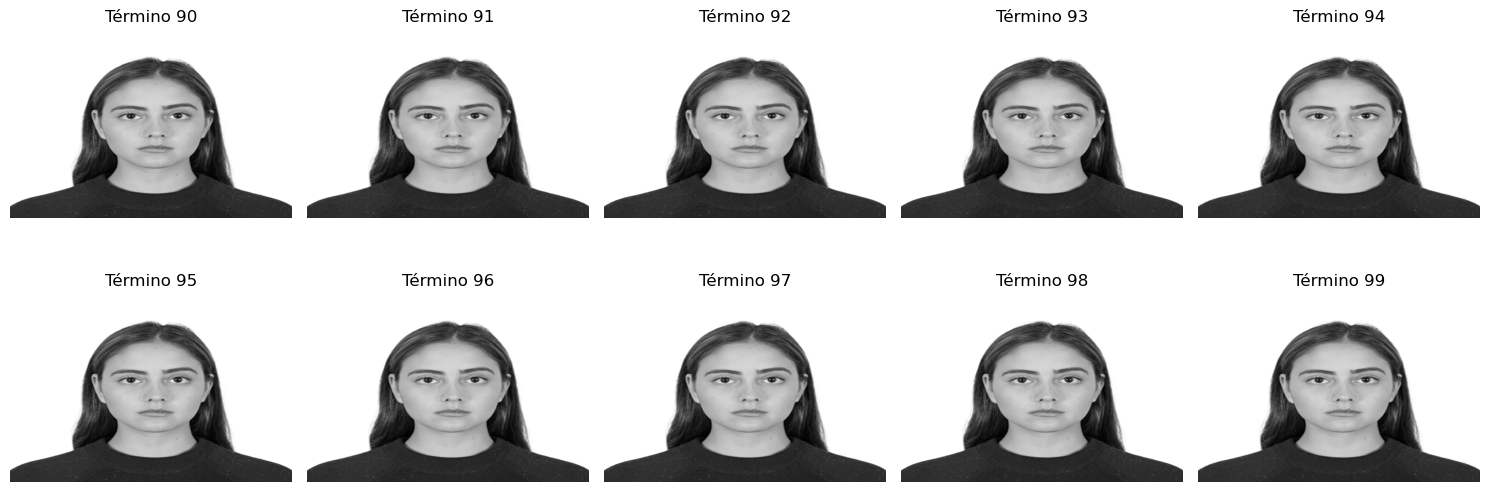

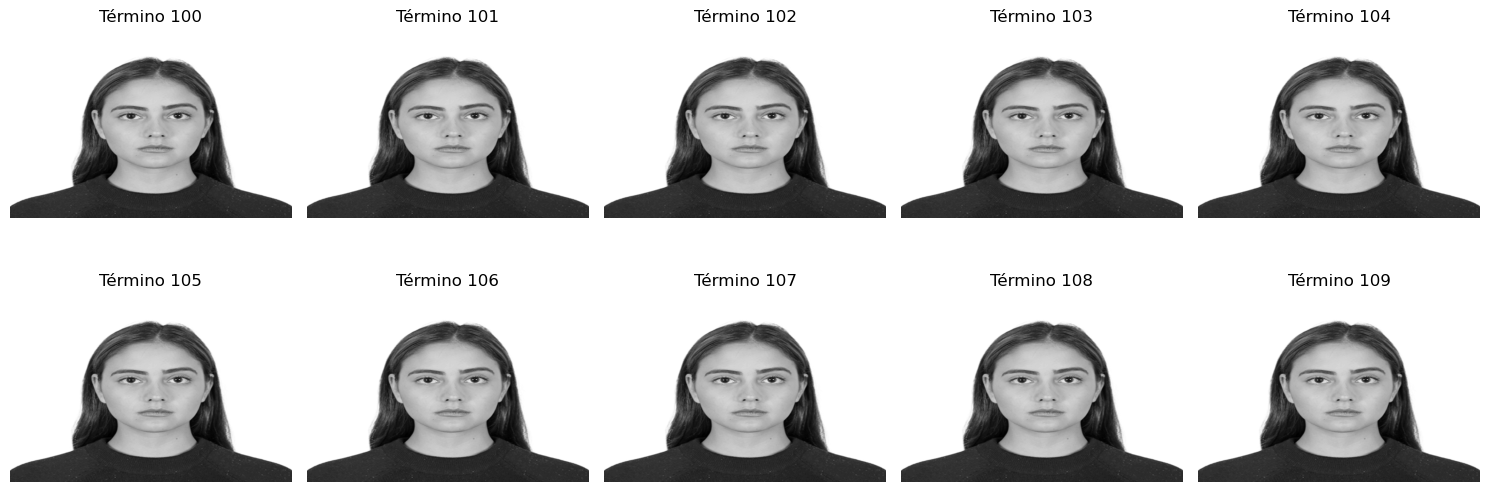

<Figure size 1500x600 with 0 Axes>

In [155]:
# Visualizar las imágenes generadas en la sucesión
plt.figure(figsize=(15, 6))
for i, imagen in enumerate(sucesion_imagenes):
    plt.subplot(2, 5, i % 10 + 1)
    plt.imshow(imagen, cmap='gray')
    plt.title(f"Término {i}")
    plt.axis('off')
    if (i + 1) % 10 == 0:
        plt.tight_layout()
        plt.show()
        plt.figure(figsize=(15, 6))

La tasa de convergencia determina cuánto se ajusta la imagen generada hacia la imagen objetivo en cada iteración. 

Un valor mayor de tasa de convergencia hará que la imagen generada converja más rápidamente hacia la imagen objetivo, pero también puede hacer que el proceso sea más inestable. Un valor más bajo de tasa de convergencia hará que el proceso sea más lento pero más estable.


Número Máximo de Iteraciones (max_iteraciones): Este valor establece el límite superior para el número de iteraciones que el bucle de convergencia ejecutará. Si la sucesión no converge después de un número determinado de iteraciones, el bucle se detendrá. Este valor se utiliza para evitar que el código se ejecute indefinidamente en caso de que la convergencia sea difícil de alcanzar. Puedes ajustar este valor según cuántas iteraciones estés dispuesto a permitir antes de declarar que la convergencia es improbable o innecesaria.

 

### Problema 6

### 1. 
Programe un algoritmo que dada una matriz aproxime su norma inducida por la norma vectorial de orden p.

In [47]:
import numpy as np

def norma_vectorial(vector, p):
    if p == 'inf':
        p = np.inf
    return np.linalg.norm(vector, ord=p)

In [49]:
def norma_inducida(matriz, p):
    max_norma = 0
    filas, columnas = matriz.shape
    
    # Calcula la norma de cada columna de la matriz usando la norma vectorial de orden p
    for i in range(columnas):
        norma_columna = norma_vectorial(matriz[:, i], p)
        if norma_columna > max_norma:
            max_norma = norma_columna
            
    return max_norma

In [27]:
# Ejemplo de matriz
matriz = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

# Orden de la norma (p)
p = "inf"  

# Calcula la norma inducida de la matriz usando la norma vectorial de orden p
norma_resultante = norma_inducida(matriz, p)

# Imprime el resultado
print(f'La norma inducida de la matriz es: {norma_resultante}')

Norma Inducida Aproximada: 2239.106964841117


### 2. 
Usando el algoritmo del ítem anterior estime la norma inducida de ordenes 1, 2, 3 y ∞ para la matríz de Hilbert de tamaño 10 × 10 definida por H10=[hij]=[1 / i+j]

In [23]:
import numpy as np

def norma_vectorial(vector, p):
    if p == 'inf':
        p = np.inf
    return np.linalg.norm(vector, ord=p)

def norma_inducida(matriz, p):
    max_norma = 0
    filas, columnas = matriz.shape
    
    # Calcula la norma de cada columna de la matriz usando la norma vectorial de orden p
    for i in range(columnas):
        norma_columna = norma_vectorial(matriz[:, i], p)
        if norma_columna > max_norma:
            max_norma = norma_columna
            
    return max_norma

# Crear la matriz de Hilbert de tamaño 10x10
matriz_hilbert = np.array([[1.0 / (i + j + 1) for i in range(10)] for j in range(10)])

# Calcular y mostrar la norma inducida para diferentes órdenes (1, 2, 3 e infinito)
for p in [1, 2, 3, 'inf']:
    norma_resultante = norma_inducida(matriz_hilbert, p)
    print(f'Norma inducida de orden {p}: {norma_resultante}')

Norma inducida de orden 1: 2.9289682539682538
Norma inducida de orden 2: 1.2448966748957686
Norma inducida de orden 3: 1.0619295534557767
Norma inducida de orden inf: 1.0


Cada una de las ordenes inducidas proporciona información sobre diferentes aspectos de la matriz:

Norma Inducida de Orden 1: 2.9289682539682538

Esta norma mide la suma de los valores absolutos de los elementos de la matriz. Es decir, para cada columna de la matriz, sumas los valores absolutos de los elementos de esa columna y tomas el máximo de esas sumas. Es especialmente útil en ciertas aplicaciones donde se desea penalizar los valores extremos de la matriz.

Norma Inducida de Orden 2: 1.2448966748957686
Esta es la norma euclidiana o la norma L2. Representa la longitud del vector más largo (columna) después de transformar la matriz en un vector. Es la forma más común de calcular la norma y se utiliza en muchas aplicaciones, como en el análisis de componentes principales (PCA) y regresiones lineales.

Norma Inducida de Orden 3: 1.0619295534557767
Esta es la norma L3, que generaliza la norma euclidiana y la norma de Manhattan (L1). Calcula la raíz cúbica de la suma de los cubos de los valores absolutos de los elementos de la matriz. Esta norma es menos común, pero puede tener aplicaciones específicas en ciertos problemas matemáticos y científicos.

Norma Inducida de Orden Infinito (∞): 1.0
Esta norma, también conocida como norma del máximo, mide el valor absoluto más grande dentro de la matriz. Es decir, toma el máximo valor absoluto de entre todos los elementos de la matriz. Esta norma es útil cuando se quiere saber cuán grande puede volverse un elemento de la matriz en términos absolutos.
Cada orden de norma tiene sus propias aplicaciones y contextos en los que son útiles. La elección de la norma depende del problema específico que estés tratando de resolver y de qué aspecto particular de los datos estás interesado en medir o minimizar.